In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 30, 30, 64)     

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=6,validation_data=validation_ds)

Epoch 1/6
625/625 [==============================] - 55s 84ms/step - loss: 0.6730 - accuracy: 0.5810 - val_loss: 0.6264 - val_accuracy: 0.6496
Epoch 2/6
625/625 [==============================] - 56s 88ms/step - loss: 0.5915 - accuracy: 0.6824 - val_loss: 0.5521 - val_accuracy: 0.7278
Epoch 3/6
625/625 [==============================] - 51s 82ms/step - loss: 0.4857 - accuracy: 0.7631 - val_loss: 0.5258 - val_accuracy: 0.7532
Epoch 4/6
625/625 [==============================] - 54s 85ms/step - loss: 0.3579 - accuracy: 0.8396 - val_loss: 0.7133 - val_accuracy: 0.7376
Epoch 5/6
625/625 [==============================] - 54s 86ms/step - loss: 0.2018 - accuracy: 0.9154 - val_loss: 0.8848 - val_accuracy: 0.7516
Epoch 6/6
625/625 [==============================] - 52s 83ms/step - loss: 0.1100 - accuracy: 0.9599 - val_loss: 1.1734 - val_accuracy: 0.7360


Exception ignored in: <function _xla_gc_callback at 0x7f9aa39c3e20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


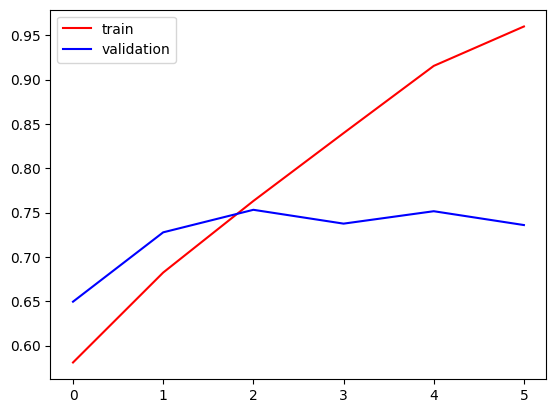

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

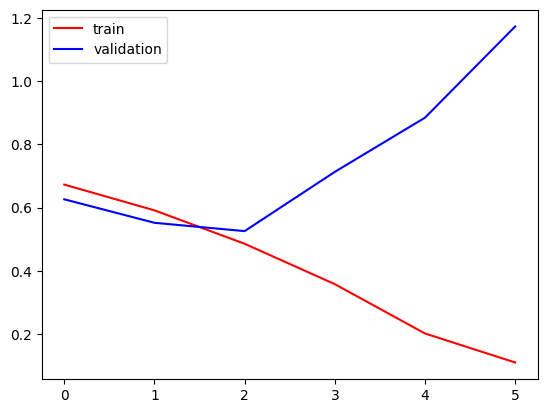

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()